In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

C:\Users\ATHARVA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Image loaded successfully


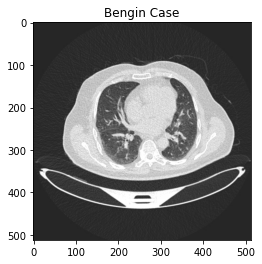

In [5]:
import cv2

img = cv2.imread("D:\Data sciences\Lung_cancer_prediction\The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (1).jpg")
if img is None:
    print("Error: Unable to read image")
else:
    print("Image loaded successfully")
plt.title('Bengin Case')
plt.imshow(img, label = 'Bengin Case')

Image loaded successfully


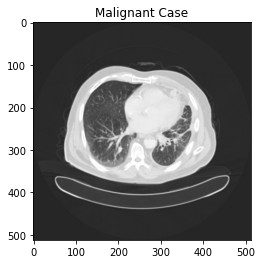

In [17]:
img = cv2.imread("D:\Data sciences\Lung_cancer_prediction\The IQ-OTHNCCD lung cancer dataset\Malignant cases\Malignant case (1).jpg")
if img is None:
    print("Error: Unable to read image")
else:
    print("Image loaded successfully")
plt.title('Malignant Case')
plt.imshow(img)

Image loaded successfully


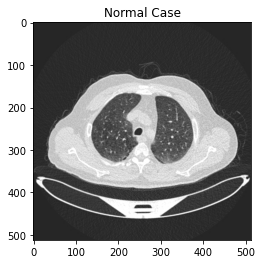

In [19]:
img = cv2.imread(r"D:\Data sciences\Lung_cancer_prediction\The IQ-OTHNCCD lung cancer dataset\Normal cases\Normal case (2).jpg")
if img is None:
    print("Error: Unable to read image")
else:
    print("Image loaded successfully")
plt.title('Normal Case')
plt.imshow(img)

In [21]:
img.shape

(512, 512, 3)

In [22]:
dir = "D:\Data sciences\Lung_cancer_prediction\The IQ-OTHNCCD lung cancer dataset"
img_width = 256
img_height = 256

In [25]:
import os

In [26]:
# Second section of the path
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [27]:
random.shuffle(img_data)

In [28]:
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)
    
#Convert X and Y list into array
X=np.array(x, dtype = float)
Y=np.array(y, dtype = float)

In [29]:
print(X[19])

[[[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [51. 51. 51.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [60. 60. 60.]
  [47. 47. 47.]
  [41. 41. 41.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [49. 49. 49.]
  [47. 47. 47.]
  [59. 59. 59.]]

 ...

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [57. 57. 57.]
  [52. 52. 52.]
  [42. 42. 42.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [52. 52. 52.]
  [45. 45. 45.]
  [39. 39. 39.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [48. 48. 48.]
  [38. 38. 38.]
  [38. 38. 38.]]]


In [30]:
for i in range(len(X)):
    X[i] = X[i]/255.0

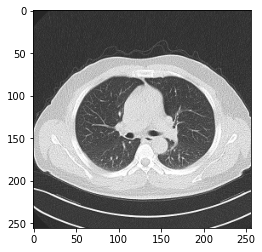

In [31]:
plt.imshow(X[19])

In [32]:
print(X[19])

[[[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.2        0.2        0.2       ]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.23529412 0.23529412 0.23529412]
  [0.18431373 0.18431373 0.18431373]
  [0.16078431 0.16078431 0.16078431]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.19215686 0.19215686 0.19215686]
  [0.18431373 0.18431373 0.18431373]
  [0.23137255 0.23137255 0.23137255]]

 ...

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.22352941 0.22352941 0.22352941]
  [0.20392157 0.20392157 0.20392157]
  [0.16470588 0.16470588 0.16470588]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]


In [33]:
X.shape

(1097, 256, 256, 3)

In [34]:
x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.2)

In [35]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(128, (3, 3), padding = 'same', input_shape = X.shape[1: ], activation = 'relu'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2, seed = 12))
model.add(Dense(3000, activation = 'relu'))
model.add(Dense(1500, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [38]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 average_pooling2d (Average  (None, 128, 128, 128)     0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       1

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [42]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable
   -------------------------------------- 103.2/103.2 kB 744.0 kB/s eta 0:00:00


In [50]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val),epochs = 15)

Epoch 1/15
22/22 [==============================] - 177s 8s/step - loss: 1.2083 - accuracy: 0.4950 - val_loss: 1.0845 - val_accuracy: 0.4545
Epoch 2/15
22/22 [==============================] - 179s 8s/step - loss: 0.9629 - accuracy: 0.5064 - val_loss: 0.9250 - val_accuracy: 0.5398
Epoch 3/15
22/22 [==============================] - 175s 8s/step - loss: 0.8973 - accuracy: 0.6020 - val_loss: 0.7395 - val_accuracy: 0.7159
Epoch 4/15
22/22 [==============================] - 161s 7s/step - loss: 0.7894 - accuracy: 0.6334 - val_loss: 0.6612 - val_accuracy: 0.7386
Epoch 5/15
22/22 [==============================] - 161s 7s/step - loss: 0.7162 - accuracy: 0.7147 - val_loss: 0.5441 - val_accuracy: 0.8011
Epoch 6/15
22/22 [==============================] - 159s 7s/step - loss: 0.5748 - accuracy: 0.7775 - val_loss: 0.4252 - val_accuracy: 0.8125
Epoch 7/15
22/22 [==============================] - 160s 7s/step - loss: 0.5375 - accuracy: 0.8031 - val_loss: 0.4206 - val_accuracy: 0.8295
Epoch 8/15
22

In [57]:
model.evaluate(x_test, y_test)[1]*100

7/7 [==============================] - 14s 2s/step - loss: 0.0865 - accuracy: 0.9909


99.09090995788574

In [52]:
result = model.predict(x_test)

7/7 [==============================] - 10s 1s/step


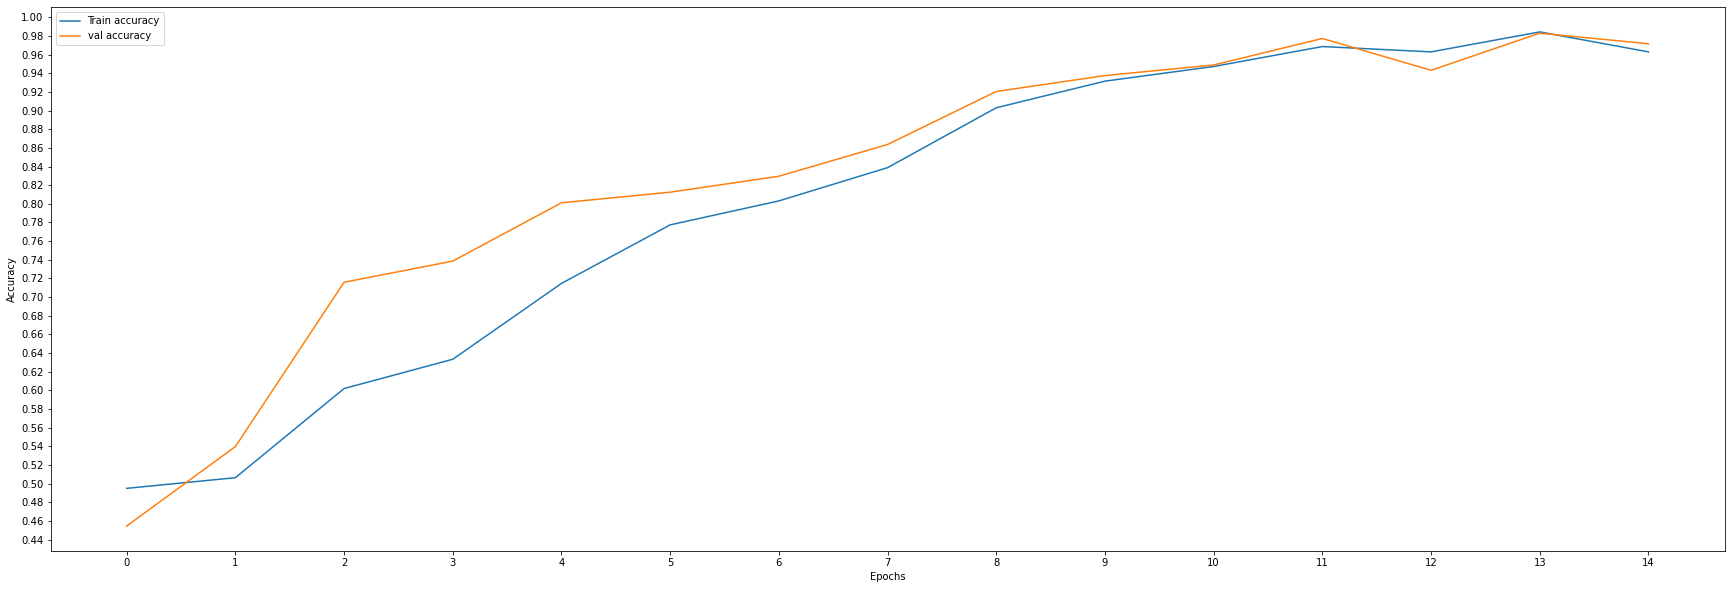

In [75]:
plt.figure(figsize=(30,10))
plt.yticks(np.arange(0.0, 1.05,0.02)) 
plt.xticks(np.arange(0, 16,1)) 
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

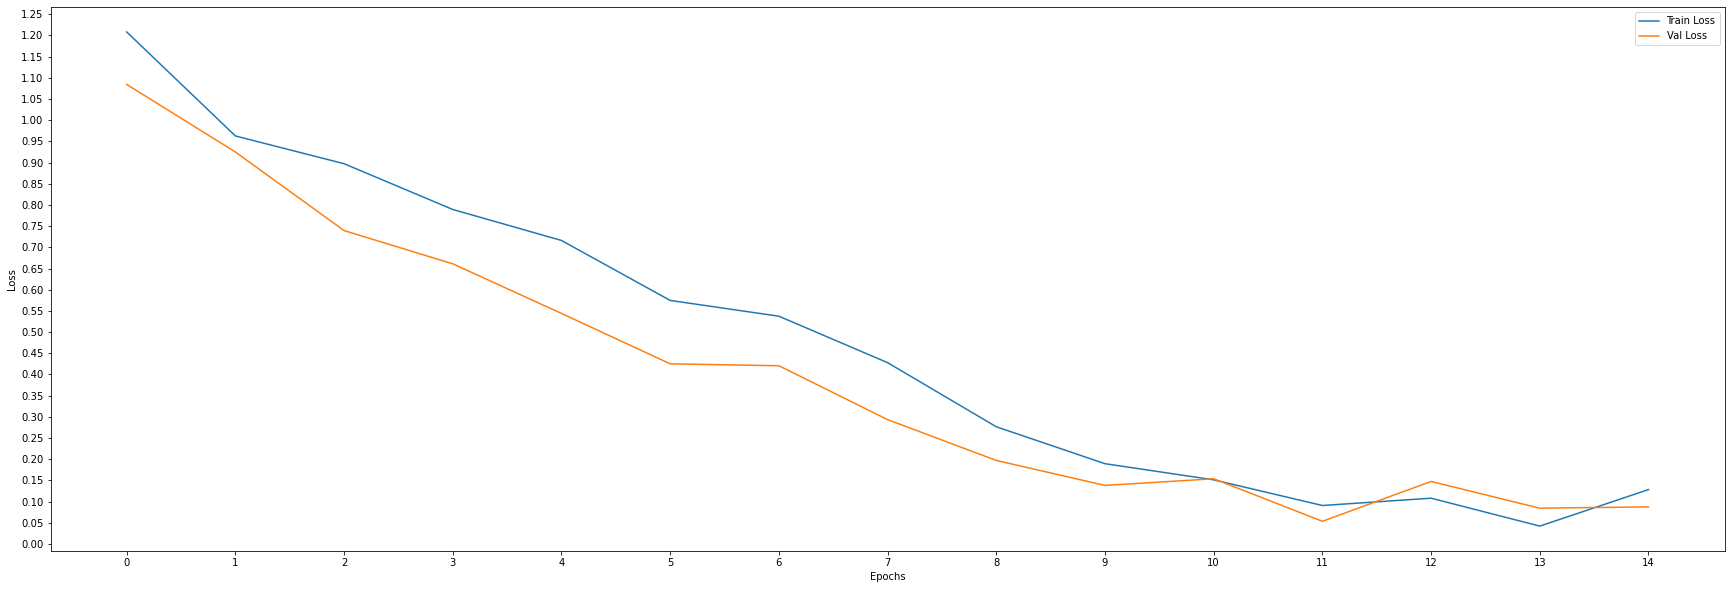

In [71]:
plt.figure(figsize=(30,10))
plt.yticks(np.arange(0.0, 1.6,0.05)) 
plt.xticks(np.arange(0, 16,1)) 
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc = 'best')